In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [3]:
train_dir = '/content/drive/MyDrive/archive (8)/dataset/training_set'
val_dir = '/content/drive/MyDrive/archive (8)/dataset/test_set'

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Only rescale for validation
val_datagen = ImageDataGenerator(rescale=1./255)

# Prepare iterators
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),  # Resize all images to 150x150
    batch_size=32,
    class_mode='binary'  # Binary classification
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 8030 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Regularization
    Dense(1, activation='sigmoid')  # Binary output
])

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 34, 34, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 17, 17, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 36992)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      18,940,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,034,177 (72.61 MB)

 Trainable params: 19,034,177 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 581s 2s/step - accuracy: 0.6749 - loss: 0.5953 - val_accuracy: 0.7384 - val_loss: 0.5310
Epoch 2/20
  1/250 ━━━━━━━━━━━━━━━━━━━━ 6:18 2s/step - accuracy: 0.5938 - loss: 0.6563

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5938 - loss: 0.6563 - val_accuracy: 0.6875 - val_loss: 0.4460
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6882 - loss: 0.5786Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 22ms/step - accuracy: 0.7188 - loss: 0.5477 - val_accuracy: 0.4375 - val_loss: 0.9223
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 557s 2s/step - accuracy: 0.6919 - loss: 0.5776 - val_accuracy: 0.7339 - val_loss: 0.5258
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 7s 23ms/step - accuracy: 0.7812 - loss: 0.5817 - val_accuracy: 0.8125 - val_loss: 0.6839
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 541s 2s/step - accuracy: 0.6983 - loss: 0.5651 - val_accuracy: 0.7686 - val_loss: 0.5043
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 857us/step - accuracy: 0.8750 - loss: 0.4725 - val_accuracy: 0.5625 - val_loss: 0.6505
Epoch 9/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 547s 2s/step - accuracy: 0.7270 - loss: 0.5452 - val_accuracy: 0.7324 - val_loss: 0.5190
Epoch 10/20
250/250 ━━━

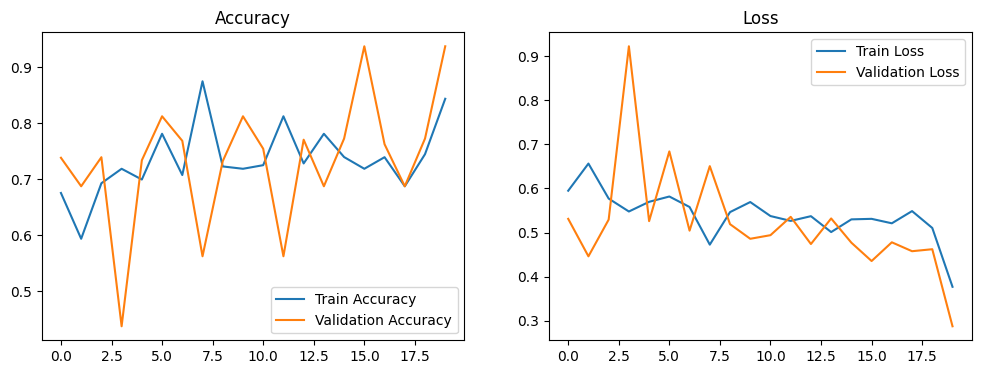

In [10]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.show()


In [11]:
model.save('cat_dog_classifier.h5')



In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load a single image for prediction
img_path = '/content/drive/MyDrive/archive (8)/dataset/single_prediction/cat_or_dog_2.jpg'
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img) / 255.0
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)
print("Prediction:", "Dog" if prediction[0][0] > 0.5 else "Cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Prediction: Cat
